[WARNING] KRAKEN: Range dependant ssp not supported, using median values instead !
Content of the file: '/tmp/tmp75hz6o1b.env'.
'Example'
500.000000
1
'CVW'
0 0.0 758.257500
7.575000 1400.000000 0.0 1.030000 0.0 0.0 /
10.000000 1400.000000 /
150.000000 1400.000000 /
300.000000 1400.000000 /
400.000000 1600.000000 /
758.257500 1600.000000 /
'A' 0.200000
650.000000 6000.000000 3500.000000 2.750000 0.020000 0.020000
0.000000 999999999.000000
0.505000
1
10.000000 /
720
0.000000 750.000000 /
1081
-0.500000 0.500000 /

Content of the file: '/tmp/tmp75hz6o1b.flp'.
/
'RAOC'
999999999
1
0.000000
1081
-0.500000 0.500000 /
1
10.000000 /
720
0.000000 750.000000 /
720
0.000000 /

[WARNING] KRAKEN: Range dependant ssp not supported, using median values instead !
Content of the file: '/tmp/tmpaiqpr6la.env'.
'Example'
500.000000
1
'CVW'
0 0.0 758.257500
7.575000 1400.000000 0.0 1.030000 0.0 0.0 /
10.000000 1400.000000 /
150.000000 1400.000000 /
300.000000 1400.000000 /
400.000000 1600.000000 /
758.257

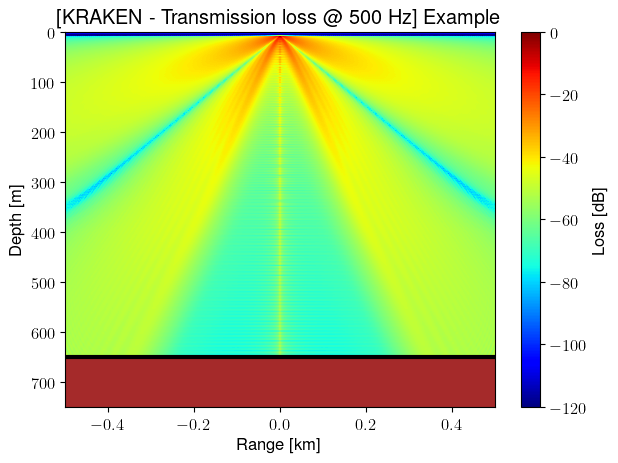

[INFO] KRAKEN: Do not support range dependant sound speed, using median values instead !


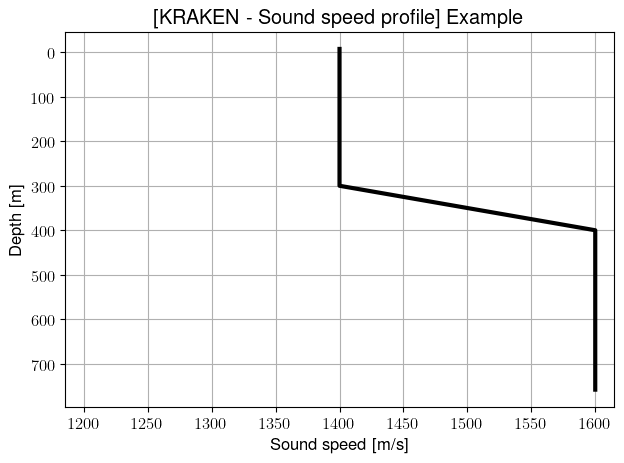

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[KRAKEN - Modes] First 5 Shapes'}, ylabel='Depth [m]'>)

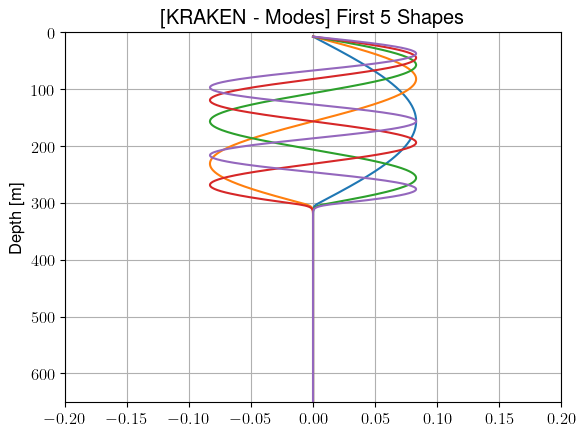

In [2]:
import arlpy.uwapm as pm
import numpy as np

x = np.linspace(-500, 500, 1081)
z = np.linspace(0, 750,  720)
depth = 650

ssp_range = np.array([0, 3000, 5000])
ssp_depth = np.array([10, 150, 300, 400])
ssp       = np.array([[1200,  1600, 1600],
                      [1200,  1600, 1600],
                      [1600,  1200, 1200], 
                      [1600,  1600, 1600]])

tx_freq  = 500
tx_depth = 10

env = pm.make_env2d(
                
        pad_inputData   = True, 
        name            = 'Example',

        # BELLHOP/KRAKEN: attn
        volume_attn     = None,
        
        # ALL: Receiver positoins
        rx_range        = x,                                                   # m
        rx_depth        = z,                                                   # m
        
        # OALIB: Top boundary condition
        top_boundary    = 'vacuum',
        
        # ALL: Sound speed profiles
        ssp_depth       = ssp_depth,                                           # m
        ssp             = ssp,                                                 # m/s
        ssp_range       = ssp_range,

        # OALIB: Sound speed interpolation
        ssp_interp      = 'c-linear',
        
        # ALL: Source freq and depth
        tx_freq         = tx_freq,                                             # Hz
        tx_depth        = tx_depth,                                            # m

        # ALL: Bottom interface
        bot_interface   = np.column_stack((0, depth)),                 # m
                                                        
        # OALIB: Bottom boundary 
        bot_boundary    = 'acousto-elastic',
        attn_unit       = 'dB/wavelength',
        bot_roughness   = 0.2,                                                 # m (rms)
        bot_density     = 2.75,                                                # g/cm3
        bot_PwaveSpeed  = 6000,                                                # m/s 
        bot_SwaveSpeed  = 3500,                                                # m/s 
        bot_PwaveAttn   = 0.02,                                                # dB/wavelength 
        bot_SwaveAttn   = 0.02,                                                # dB/wavelength 
        )

KRAKEN = pm.KRAKEN(env)
KRAKEN.compute_transmission_loss(debug=True)
KRAKEN.compute_modes()

KRAKEN.plot_transmission_loss()
KRAKEN.plot_ssp()
KRAKEN.plot_modes(5)